# Holen aller Symbole der stockexchanges (map)

In [23]:
import os, json
data_folder  = "/Users/a2/code/fin/trade/data/financial"
sx_symbol_map = {}
tickers = os.listdir(data_folder)
for ticker in tickers:
    with open(os.path.join(data_folder, ticker, "symbols.json"), "r") as f:
        sx_symbol_map[ticker]  = json.load(f)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/a2/code/fin/trade/data/financial/L/symbols.json'

In [ ]:
# holen der specinal isin
import json
with open("/Users/a2/code/fin/trade/select.json", "r") as f:
    isins = json.load(f)

with open("/Users/a2/code/fin/trade/data/financial/DE/d_ISIN_symbol.json", "r") as f:
    isy = json.load(f)

stocks = [isy[i] + ".DE" for i in isins]

# Minutendaten

In [ ]:
import yfinance as yf
from requests import Session
from requests_cache import CacheMixin, SQLiteCache
from requests_ratelimiter import LimiterMixin, MemoryQueueBucket
from pyrate_limiter import Duration, RequestRate, Limiter
class CachedLimiterSession(CacheMixin, LimiterMixin, Session):
    pass

session = CachedLimiterSession(
    limiter=Limiter(RequestRate(2, Duration.SECOND*5)),  # max 2 requests per 5 seconds
    bucket_class=MemoryQueueBucket,
    backend=SQLiteCache("yfinance.cache"),
)




In [ ]:
import yfinance as yf
import pandas as pd, os

import requests_cache

session = requests_cache.CachedSession('yfinance.cache')
session.headers['User-agent'] = 'my-program/1.0'
# ticker = yf.Ticker('msft', session=session)
# # The scraped response will be stored in the cache
# ticker.actions
data_path = "/Users/a2/code/fin/trade/data/financial/DE/data/minute"

# Liste einiger LSE Symbole (du kannst diese Liste erweitern)
symbols = stocks

# Erstelle ein Dictionary, um die Daten zu speichern
stock_data = {}

# Ziehe die Minutendaten für jedes Symbol
for symbol in symbols:
    print(f"Fetching data for {symbol}...")
    ticker = yf.Ticker(symbol, session=session)
    # Hole die letzten 7 Tage Minutendaten (maximal mögliche Historie bei minutengenauer Abfrage)
    # Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
    hist = ticker.history(period='max', interval='1m')
    stock_data[symbol] = hist


for symbol, data in stock_data.items():
    
    data.to_csv(os.path.join(data_path, symbol+".csv"))

print("Daten wurden erfolgreich gespeichert.")


Fetching data for ADS.DE...
Fetching data for AIR.DE...
Fetching data for ALV.DE...
Fetching data for BAS.DE...
Fetching data for BMW.DE...
Fetching data for BAYN.DE...
Fetching data for BEI.DE...
Fetching data for BNR.DE...
Fetching data for CBK.DE...
Fetching data for CON.DE...
Fetching data for 1COV.DE...
Fetching data for DTG.DE...
Fetching data for DBK.DE...
Fetching data for DB1.DE...
Fetching data for DHL.DE...
Fetching data for P911.DE...
Fetching data for DTE.DE...
Fetching data for EOAN.DE...
Fetching data for FRE.DE...
Fetching data for HNR1.DE...
Fetching data for HEI.DE...
Fetching data for HEN3.DE...
Fetching data for IFX.DE...
Fetching data for MBG.DE...
Daten wurden erfolgreich gespeichert.


- now we have the data
- lets load it

In [27]:
# wir holen uns die daten
import os
wd = "/Users/a2/code/fin/trade/data/financial/DE/data/minute"
sxsx = os.listdir(wd)

# modell pls
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from chronos import ChronosPipeline

os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
import torch
pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-large",
  device_map="cpu",
  torch_dtype=torch.bfloat16,
)


AIR.DE.csv


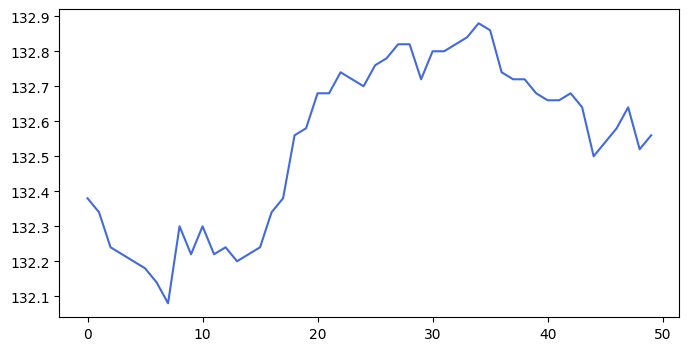

1904
ps
pe


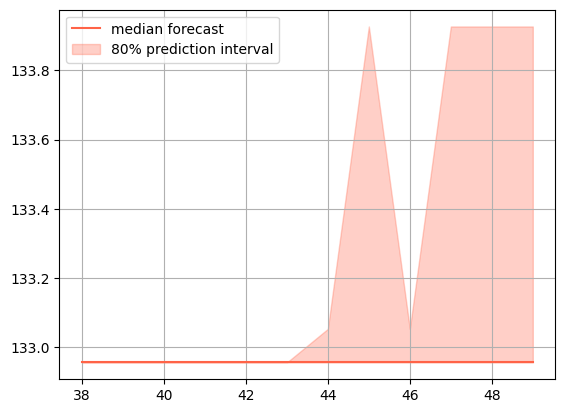

BAS.DE.csv


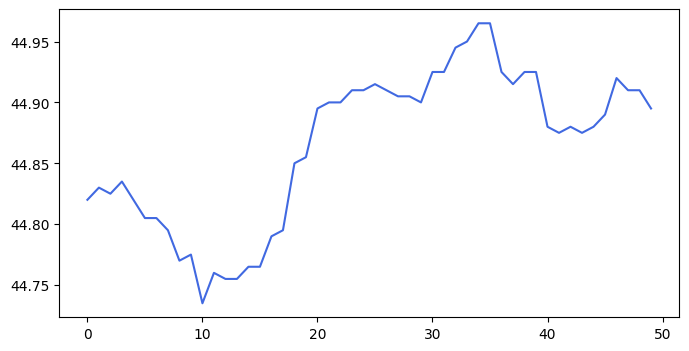

2382
ps


KeyboardInterrupt: 

In [ ]:

# was wollen wir 
for s in sxsx:
    input()
    print(s)
    prediction_length = 12
    df = pd.read_csv(os.path.join(wd, s))

    t_main = torch.tensor(df["Close"]) 

    plt.figure(figsize=(8, 4))
    plt.plot(t_main[-50:], color="royalblue", label="historical data")

    
    context = t_main[:-prediction_length]
    print(len(context))
    print("ps")
    forecast = pipeline.predict(context, prediction_length)
    print("pe")
    forecast_index = range(len(t_main) -prediction_length, len(t_main))
    low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)
   
    plt.plot(forecast_index, median, color="tomato", label="median forecast")
    plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
    plt.legend()
    plt.grid()
    plt.show()

KeyboardInterrupt: Interrupted by user

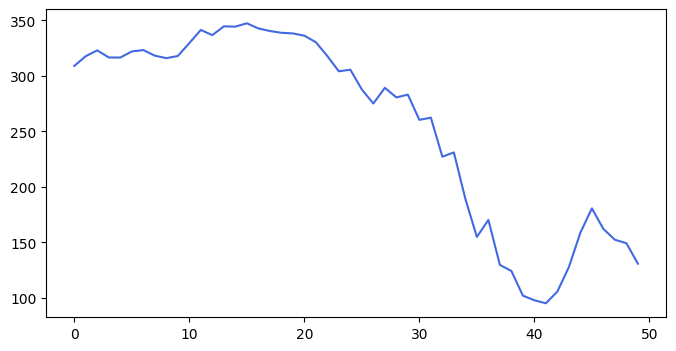

In [51]:
prediction_length = 25
df = pd.read_csv("/Users/a2/code/fin/trade/data/financial/NASDAQ/data/day/BA.csv")

t_main = torch.tensor(df["Close"]) 

plt.figure(figsize=(8, 4))
plt.plot(t_main[-50:], color="royalblue", label="historical data")



In [44]:

context = t_main[:-prediction_length]
print(len(context))
print("ps")
forecast = pipeline.predict(context, prediction_length)
print("pe")

low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)


14638
ps
pe


In [46]:
low

array([13.39125357, 13.36808524, 13.36808524, 12.95105699, 13.20590768,
       12.95105699, 12.92788875, 12.90472052, 12.71937378, 12.48769142,
       12.71937378, 12.71937378, 12.48769142, 12.48769142, 12.44135486,
       12.62670075, 12.04749494, 12.02432661, 12.25600906, 12.25600906,
       12.69620555, 12.92788875, 12.69620555, 13.15957111, 12.48769142])

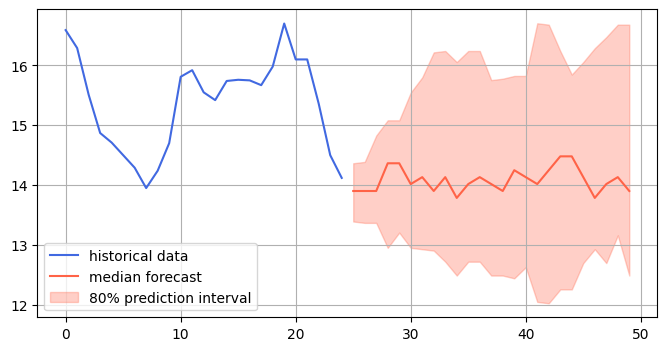

In [45]:
forecast_index = range(25, 50)
plt.figure(figsize=(8, 4))
plt.plot(context[-25:], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

In [ ]:
a = "jabjaj"
a[-4:-2]

'jabj'

In [35]:
forecast[0]

tensor([[132.9563, 132.9563, 132.9563, 132.9563, 132.9563, 132.9563, 132.9563,
         132.9563, 133.9268, 133.9268, 133.9268, 133.9268],
        [132.9563, 132.9563, 132.9563, 132.9563, 132.9563, 132.9563, 132.9563,
         132.9563, 132.9563, 132.9563, 132.9563, 132.9563],
        [132.9563, 132.9563, 132.9563, 132.9563, 132.9563, 132.9563, 132.9563,
         132.9563, 132.9563, 132.9563, 132.9563, 132.9563],
        [132.9563, 132.9563, 132.9563, 132.9563, 132.9563, 132.9563, 132.9563,
         132.9563, 132.9563, 132.9563, 132.9563, 132.9563],
        [132.9563, 132.9563, 132.9563, 132.9563, 132.9563, 132.9563, 132.9563,
         132.9563, 132.9563, 132.9563, 132.9563, 132.9563],
        [132.9563, 132.9563, 132.9563, 132.9563, 132.9563, 132.9563, 132.9563,
         132.9563, 132.9563, 132.9563, 132.9563, 132.9563],
        [132.9563, 132.9563, 132.9563, 132.9563, 132.9563, 132.9563, 132.9563,
         132.9563, 132.9563, 132.9563, 132.9563, 132.9563],
        [132.9563, 132.9563